# Pandas

This notebook contains examples of using Pandas to perform explorator data analysis (EDA) on tabular data.

In [2]:
import pandas as pd # Import pandas!

In [63]:
# Read in the mouse data (we'll go over additional examples of reading data in below).

mouseDF = pd.read_csv('../data/mousew.csv')

mouseDF # This just shows us what part of the dataframe looks like.

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837
2,C57Bl/6J,M,28.460685
3,C57Bl/6J,M,29.248225
4,C57Bl/6J,M,25.702118
...,...,...,...
395,DBA/2J,F,20.489587
396,DBA/2J,F,21.512789
397,DBA/2J,F,18.677338
398,DBA/2J,F,22.974729


## Writing data out

We can write a DataFrame to lots of formats. Here are some poular ones:
  * CSV (comma separated values)
  * TSV (tab separated values)
  * JSON (JavaScript Object Notation)
  * Excel

In [11]:
# If you happen to be writing to or reading from an Excel (.xlsx or .xls) file (like we are in this cell), 
# you'll need to install the Python library openpyxl. Use the magic pip command forthis:
%pip install openpyxl

# CSV (comma separated values):
mouseDF.to_csv('../data/mousew2.csv')

# TSV (tab separated values):
mouseDF.to_csv('../data/mousew.tsv', sep='\t')

# JSON (JavaScript Object Notation -- lists each row in the DataFrame as a dictionary with columns 
# as keys and their data in that row as values.
mouseDF.to_json('../data/mousew.json')

# Excel:
mouseDF.to_excel('../data/mousew.xlsx')

# By default, the .to_*() calls will add an Index column; you can prevent that column from being 
# output by passing in an index=False argument:
mouseDF.to_csv('../data/mousew2-noindex.csv', index=False)



Note: you may need to restart the kernel to use updated packages.


## Reading data in

When we read data in, we use the pandas module directl (which we import as `pd` by convention). This is different from writing data out, where we call the `.to_*()` method on the DataFrame we want to save.

In [21]:
# TSV
df = pd.read_table('../data/mousew.tsv')
df = pd.read_table('../data/mousew.tsv', index_col=0) # Use this if the TSV file was written with indexes included.
df

# CSV
df = pd.read_csv('../data/mousew.csv')
df
# ***OR****
df = pd.read_table('../data/mousew.csv', delimiter=',')
df

# JSON
df = pd.read_json('../data/mousew.json')
df

# Excel
df = pd.read_excel('../data/mousew.xlsx')
df = pd.read_excel('../data/mousew.xlsx', index_col=0) # Use this if the Excel file was written with indexes included.
df

# If you have a large file, pass in an argument for the `nrows` parameter,
# Here we're only reading in the first 100 rows:
df = pd.read_csv('../data/mousew.csv', nrows=100)
df

# Pandas can read compressed files automatically! Use the 'compress' parameter
# if not using a standard extension (like .gz, .zip, .bz2, etc.).
df = pd.read_csv('../data/mousew.csv.gz')
df

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837
2,C57Bl/6J,M,28.460685
3,C57Bl/6J,M,29.248225
4,C57Bl/6J,M,25.702118
...,...,...,...
395,DBA/2J,F,20.489587
396,DBA/2J,F,21.512789
397,DBA/2J,F,18.677338
398,DBA/2J,F,22.974729


## Creating DataFrames from a dictionary or set of lists

In [22]:
# Creating a DataFrame from a list of dictionaries:
rawData = [
    {
        'strain': 'C57BI/6J',
        'sex': 'M',
        'weight': 27.596753
    },
    {
        'strain': 'C57BI/6J',
        'sex': 'M',
        'weight': 29.248225
    },
    # ...
]

data = pd.DataFrame(rawData)
data


,strain,sex,weight
0,C57BI/6J,M,27.596753
1,C57BI/6J,M,29.248225


In [23]:
# Creating a DataFrame from a list of lists + column names:
rawData = [
    ['C57BI/6J', 'M', 27.596753],
    ['C57BI/6J', 'M', 29.248225]
]

data = pd.DataFrame(rawData, columns=['strain', 'sex', 'weight'])
data

,strain,sex,weight
0,C57BI/6J,M,27.596753
1,C57BI/6J,M,29.248225


## Basic pandas—examining DataFrames

Some of the things we might


In [24]:
# How many rows?
# Finding the length (number of keys in) a dictionary:
# x = {'key1': 1, 'key2': 2, 'key3': 3, 'key4': 4}
# len(x.keys())

len(mouseDF)

400

In [27]:
# How many columns?
print(mouseDF.columns)
len(mouseDF.columns)

Index(['strain', 'sex', 'weight'], dtype='object')


3

In [28]:
# We can ask for the shape of a DataFrame, which gives us a tuple with these values:

mouseDF.shape

(400, 3)

In [30]:
# Get the number of rows or columns using mouseDF.shape:

mouseDF.shape[0] # <- rows
mouseDF.shape[1] # <- columns

3

In [31]:
# Select the weight column, which is a Series object.
# Preferred way:
mouseDF['weight']

0      27.596753
1      29.635837
2      28.460685
3      29.248225
4      25.702118
         ...    
395    20.489587
396    21.512789
397    18.677338
398    22.974729
399    19.312054
Name: weight, Length: 400, dtype: float64

In [32]:
# Dot notation -- not preferred (avoid this, please).
mouseDF.weight

0      27.596753
1      29.635837
2      28.460685
3      29.248225
4      25.702118
         ...    
395    20.489587
396    21.512789
397    18.677338
398    22.974729
399    19.312054
Name: weight, Length: 400, dtype: float64

In [34]:
# See just the first 10 lines (if you omit the argument, the default is 5)

mouseDF.head(10)

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837
2,C57Bl/6J,M,28.460685
3,C57Bl/6J,M,29.248225
4,C57Bl/6J,M,25.702118
5,C57Bl/6J,M,26.972696
6,C57Bl/6J,M,30.352504
7,C57Bl/6J,M,29.056024
8,C57Bl/6J,M,27.869612
9,C57Bl/6J,M,31.025558


In [35]:
# See just the last 10 lines (or 5 if the argument is omitted)

mouseDF.tail(10)


,strain,sex,weight
390,DBA/2J,F,23.008116
391,DBA/2J,F,19.084330
392,DBA/2J,F,18.807994
393,DBA/2J,F,22.977515
394,DBA/2J,F,22.153450
395,DBA/2J,F,20.489587
396,DBA/2J,F,21.512789
397,DBA/2J,F,18.677338
398,DBA/2J,F,22.974729
399,DBA/2J,F,19.312054


In [36]:
# Get basic stats about each numeric column.
mouseDF['weight'].describe()

count    400.000000
mean      24.002120
std        3.536213
min       17.411034
25%       20.946523
50%       23.474883
75%       27.120553
max       32.848227
Name: weight, dtype: float64

In [37]:
# Summarize all of the numeric columns of a DataFrame:
mouseDF.describe()

,weight
count,400.000000
mean,24.002120
std,3.536213
min,17.411034
25%,20.946523
50%,23.474883
75%,27.120553
max,32.848227


In [38]:
# Sum every column -- what looks amiss about the result?
mouseDF.sum()

strain    C57Bl/6JC57Bl/6JC57Bl/6JC57Bl/6JC57Bl/6JC57Bl/...
sex       MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
weight                                              9600.85
dtype: object

In [39]:
# Sum only the selected columns.

mouseDF[['weight']].sum()

weight    9600.848108
dtype: float64

In [40]:
# Also, min, max, count, mean:

print('MIN:\n', mouseDF.min())
print('\nMAX:\n', mouseDF.max())
print('\nCOUNT:\n', mouseDF.count())
print('\nMEAN:\n', mouseDF.mean())

MIN:
 strain    C57Bl/6J
sex              F
weight      17.411
dtype: object

MAX:
 strain     DBA/2J
sex             M
weight    32.8482
dtype: object

COUNT:
 strain    400
sex       400
weight    400
dtype: int64

MEAN:
 weight    24.00212
dtype: float64


## Selecting data in pandas

In [42]:
# Selecting columns:
mouseDF['weight'] # --> returns a Series (a single column)
mouseDF.weight # <- AVOID THIS dot notation.

mouseDF[['strain', 'weight']] # --> returns a DataFrame (two or more columns)

,strain,weight
0,C57Bl/6J,27.596753
1,C57Bl/6J,29.635837
2,C57Bl/6J,28.460685
3,C57Bl/6J,29.248225
4,C57Bl/6J,25.702118
...,...,...
395,DBA/2J,20.489587
396,DBA/2J,21.512789
397,DBA/2J,18.677338
398,DBA/2J,22.974729


In [43]:
mouseDF.weight # --> generally not recommended; only works for column names witout spaces/punctuation

0      27.596753
1      29.635837
2      28.460685
3      29.248225
4      25.702118
         ...    
395    20.489587
396    21.512789
397    18.677338
398    22.974729
399    19.312054
Name: weight, Length: 400, dtype: float64

In [45]:
# Selecting columns:
mouseDF['weight']

# Selecting rows:
mouseDF[0:2] # --> returns a DataFrame containing row indexes 0 and 1 -- this is just like list slicing

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837


In [46]:
# Selecting both (an intersection of row and column):
mouseDF['weight'][1] # --> the second row of the 'weight' column
# mouseDF['weight'] -> returns a series
# (^^^)[1] -- says "get index 1 from the series"

29.635837290427972

In [47]:
# A second way of writing the same thing using .loc -- "explicit location"
mouseDF.loc[1, 'weight']

29.635837290427972

In [48]:
# A third way using .iloc -- "implicit location"
mouseDF.iloc[1, 2] # --> the 1 means "row index 1" and the 2 means "column index 2"

29.635837290427972

## Selecting rows based on criteria (filtering)

In [50]:
# How would you find all mice with weights greater than 25?
mouseDF[mouseDF['weight'] > 25]
# NOTE: 171 rows were returned out of the 400 mice.

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837
2,C57Bl/6J,M,28.460685
3,C57Bl/6J,M,29.248225
4,C57Bl/6J,M,25.702118
...,...,...,...
297,DBA/2J,M,32.848227
298,DBA/2J,M,29.093883
299,DBA/2J,M,27.920858
314,DBA/2J,F,25.661969


In [52]:
# Let's break it down here.

# This creates a boolean Series (basically a bitmap) such that a True corresponds to a 
# row where the condition (weight > 25) holds, and False otherwise.
rowsToInclude = mouseDF['weight'] > 25
rowsToInclude
# Passing this bitmap into the square brackets tells the DataFrame to only return the rows of data that
# correspond with the rows in the bitmap that are True.

0       True
1       True
2       True
3       True
4       True
       ...  
395    False
396    False
397    False
398    False
399    False
Name: weight, Length: 400, dtype: bool

In [53]:
mouseDF[rowsToInclude]

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837
2,C57Bl/6J,M,28.460685
3,C57Bl/6J,M,29.248225
4,C57Bl/6J,M,25.702118
...,...,...,...
297,DBA/2J,M,32.848227
298,DBA/2J,M,29.093883
299,DBA/2J,M,27.920858
314,DBA/2J,F,25.661969


In [54]:
# Let's try a trickier one...select all mice who are male and have a weight *below* 22.

#mouseDF[ mouse is male AND mouse weight < 22  ]
mouseDF[(mouseDF['sex'] == 'M') & (mouseDF['weight'] < 22)]

# We need to use the bitwise AND operator (a single ampersand) to combine the bitmap from each of the
# subexpressions. It's important that both subexpression are wrapped in parentheses, otherwise 
# Bad Things Will Happen (TM). If we want to OR two bitmaps, we use | (single pipe).

,strain,sex,weight
216,DBA/2J,M,20.948356
226,DBA/2J,M,21.997478
244,DBA/2J,M,21.001669
267,DBA/2J,M,20.988524


In [65]:
# Find missing weights  (there is no missing data in mouseDF, so this' isn't interesting here):

# Here I'm removing a piece of data (making it NaN, or "not a number") just so we can
# see things working.
import numpy as np

a = mouseDF.loc[10, 'weight']
mouseDF.loc[10, 'weight'] = np.nan


# Here's the code to list all of the missing values in a Series.
print(mouseDF[mouseDF['weight'].isna()])


# This is just to reset the original value.
mouseDF.loc[10, 'weight'] = a


      strain sex  weight
10  C57Bl/6J   M     NaN


In [66]:
# Find rows where at least one column value is missing:
mouseDF[ mouseDF.isna().any(axis=1) ]

# The `axis=1` tells the any() method to aggregate across the columns in each row.

,strain,sex,weight


In [67]:
# Find if a column value is in a list -- not that interesting here, as we only have two 
# strains and two sexes.

mouseDF[ mouseDF['strain'].isin(['DBA/2J', 'DBA/2M'])]

,strain,sex,weight
200,DBA/2J,M,25.904390
201,DBA/2J,M,26.531042
202,DBA/2J,M,27.975234
203,DBA/2J,M,28.852402
204,DBA/2J,M,27.480579
...,...,...,...
395,DBA/2J,F,20.489587
396,DBA/2J,F,21.512789
397,DBA/2J,F,18.677338
398,DBA/2J,F,22.974729


### Question

Try this one, which combines both the row selection with the column selection and aggregation:
*find the mean weight of all female mice of the DBA/2J strain*.

In [ ]:
#TODO

## Removing data

In [68]:
# For the axis parameter -- 1 = column, 0 = row
mouseDF.drop('sex', axis=1) # This returns a "view" of the DataFrame without the 'sex' column

,strain,weight
0,C57Bl/6J,27.596753
1,C57Bl/6J,29.635837
2,C57Bl/6J,28.460685
3,C57Bl/6J,29.248225
4,C57Bl/6J,25.702118
...,...,...
395,DBA/2J,20.489587
396,DBA/2J,21.512789
397,DBA/2J,18.677338
398,DBA/2J,22.974729


In [72]:
# The original data is unaltered, though:
mouseDF

,strain,sex,weight
0,C57Bl/6J,M,27.596753
1,C57Bl/6J,M,29.635837
2,C57Bl/6J,M,28.460685
3,C57Bl/6J,M,29.248225
4,C57Bl/6J,M,25.702118
...,...,...,...
395,DBA/2J,F,20.489587
396,DBA/2J,F,21.512789
397,DBA/2J,F,18.677338
398,DBA/2J,F,22.974729


In [71]:
# You can also remove data in place. 
# Here, I'm making a copy of mouseDF first so I can use the original data later.
mouseDF2 = mouseDF.copy()
mouseDF2.drop('sex', axis=1, inplace=True)
mouseDF2

,strain,weight
0,C57Bl/6J,27.596753
1,C57Bl/6J,29.635837
2,C57Bl/6J,28.460685
3,C57Bl/6J,29.248225
4,C57Bl/6J,25.702118
...,...,...
395,DBA/2J,20.489587
396,DBA/2J,21.512789
397,DBA/2J,18.677338
398,DBA/2J,22.974729


In [ ]:
# You can drop just missing data.

# Drop any row with one or missing value:
mouseDF.dropna() 
# Same as:
mouseDF.dropna(how='any', axis=0, inplace=False)

# Drop any row missing all values.
mouseDF.dropna(how='all', axis=0, inplace=False)

# Drop any row missing all values in the columns 'sex' and 'weight'
mouseDF.dropna(how='all', axis=0, inplace=False, subset=['weight', 'sex'])

# Drop any column with at least one missing value:
mouseDF.dropna(how='any', axis=1, inplace=False)

## Working with data

In [90]:
maxWeight = mouseDF['weight'].max()
minWeight = mouseDF['weight'].min()
#(maxWeight, minWeight)


# maxWeight - mouseDF['weight']
# Here's an example of broadcasting
# -- scalar values (that's what we call single values) are broadcast 
# along the dimension of a Series.
mouseDF['scaledWeight'] = (mouseDF['weight']-minWeight)/(maxWeight-minWeight)
mouseDF

,strain,sex,weight,scaledWeight
0,C57Bl/6J,M,27.596753,0.659817
1,C57Bl/6J,M,29.635837,0.791906
2,C57Bl/6J,M,28.460685,0.715781
3,C57Bl/6J,M,29.248225,0.766797
4,C57Bl/6J,M,25.702118,0.537085
...,...,...,...,...
395,DBA/2J,F,20.489587,0.199424
396,DBA/2J,F,21.512789,0.265706
397,DBA/2J,F,18.677338,0.082029
398,DBA/2J,F,22.974729,0.360408


In [91]:
mouseDF['scaledWeight'].min(), mouseDF['scaledWeight'].max()

(0.0, 1.0)

In [82]:
# You can also broadcast scalar values across an entire DataFrame:
mouseDF[['strain', 'sex']] + '__suffix'


,strain,sex
0,C57Bl/6J__suffix,M__suffix
1,C57Bl/6J__suffix,M__suffix
2,C57Bl/6J__suffix,M__suffix
3,C57Bl/6J__suffix,M__suffix
4,C57Bl/6J__suffix,M__suffix
...,...,...
395,DBA/2J__suffix,F__suffix
396,DBA/2J__suffix,F__suffix
397,DBA/2J__suffix,F__suffix
398,DBA/2J__suffix,F__suffix


In [92]:
# We can perform row-wise operations on Series. The following
# adds the value of mouseDF['weight'][i] with mouseDF['scaledWeight'][i] 
# for each i in len(mouseDF)
mouseDF['weight'] + mouseDF['scaledWeight']

0      28.256570
1      30.427743
2      29.176466
3      30.015021
4      26.239203
         ...    
395    20.689012
396    21.778495
397    18.759367
398    23.335137
399    19.435199
Length: 400, dtype: float64

In [84]:
# for each i in len(mouseDF)
mouseDF['strain'] + '~~'+ mouseDF['sex']

0      C57Bl/6J~~M
1      C57Bl/6J~~M
2      C57Bl/6J~~M
3      C57Bl/6J~~M
4      C57Bl/6J~~M
          ...     
395      DBA/2J~~F
396      DBA/2J~~F
397      DBA/2J~~F
398      DBA/2J~~F
399      DBA/2J~~F
Length: 400, dtype: object

In [93]:
# We can also do it like this.
mouseDF['weight'].add(mouseDF['scaledWeight'])

0      28.256570
1      30.427743
2      29.176466
3      30.015021
4      26.239203
         ...    
395    20.689012
396    21.778495
397    18.759367
398    23.335137
399    19.435199
Length: 400, dtype: float64

You can do some other cool things with `add()`, `sub()`, `mul()`, `div()`, `mod()`, `pow()` with DataFrames—[check out this documentation on add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html?highlight=add).

In [94]:
# Apply a function to every element in a Series (this is slow!):
mouseDF['weight'].apply(lambda elem: (6-elem)/2)

0     -10.798377
1     -11.817919
2     -11.230343
3     -11.624112
4      -9.851059
         ...    
395    -7.244794
396    -7.756394
397    -6.338669
398    -8.487364
399    -6.656027
Name: weight, Length: 400, dtype: float64

In [95]:
# With DataFrame, we can apply a function to every row or column:
mouseDF.apply(lambda row: row['weight']/(row['scaledWeight']+2), axis=1)

0      10.375434
1      10.614913
2      10.479742
3      10.571150
4      10.130571
         ...    
395     9.315886
396     9.494960
397     8.970737
398     9.733370
399     9.095964
Length: 400, dtype: float64

## Sorting

In [96]:
 # Sort the DataFrame rows by weight.
mouseDF.sort_values(['weight'])

,strain,sex,weight,scaledWeight
386,DBA/2J,F,17.411034,0.000000
368,DBA/2J,F,17.628359,0.014078
197,C57Bl/6J,F,17.662404,0.016283
381,DBA/2J,F,17.889620,0.031002
174,C57Bl/6J,F,18.058338,0.041931
...,...,...,...,...
89,C57Bl/6J,M,31.404027,0.906447
81,C57Bl/6J,M,31.639560,0.921704
239,DBA/2J,M,31.659248,0.922980
53,C57Bl/6J,M,31.793106,0.931651


### Question

Sort the rows of `mouseDF` by sex, followed by weight, followed by strain, in descending order. Take a look at the documentation for `DataFrame.sort_values` to find out how to do this.

In [ ]:
# TODO

## Grouping

Follows a "split-apply-combine" model. This is similar to the group by in SQL and pivot table in Excel.

In [98]:
# Split
groupedByStrain = mouseDF[['strain', 'weight', 'scaledWeight']].groupby('strain')
groupedByStrain # <- grouped objects don't display as anything useful.

# Apply & combine
groupedByStrain.agg(['min', 'mean', 'max'])


weight                       scaledWeight                    
                min       mean        max          min      mean       max
strain                                                                    
C57Bl/6J  17.662404  24.156513  31.793106     0.016283  0.436963  0.931651
DBA/2J    17.411034  23.847728  32.848227     0.000000  0.416960  1.000000

### Question

Find the mean weight of mice by sex.

In [ ]:
# TODO

# Visualizing the data


Use histograms to understand the distributions of column values.

/home/hfeild/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'scaledWeight'}>]], dtype=object)

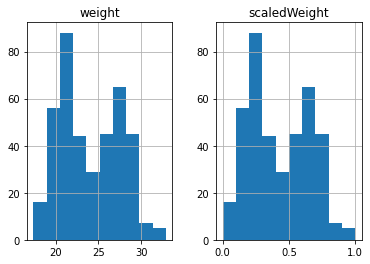

In [99]:
mouseDF.hist()